In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.signal import convolve2d, correlate2d
from skimage.color import rgb2gray
from skimage.feature import match_template

In [2]:
im = imageio.imread("MaruTaro.jpg")
im_gray = rgb2gray(im)

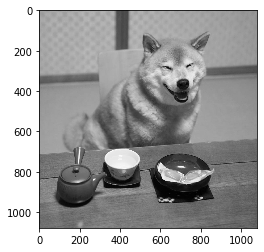

In [3]:
plt.imshow(im_gray, cmap="gray")

In [4]:
f = [1,0,1,0]
F = np.fft.fft(f)

<BarContainer object of 4 artists>

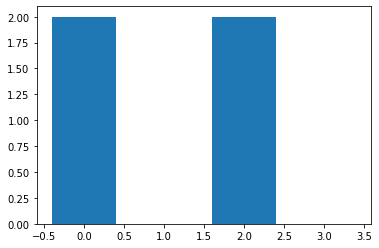

In [5]:
plt.bar(np.arange(4), F.real)

In [6]:
dft_im_gray = np.fft.fft2(im_gray) 

In [7]:
dft_im_gray[0][0]

(602825.5392227451+0j)

In [8]:
np.sum(im_gray)

602825.5392227451

In [9]:
im_log = np.log(dft_im_gray)

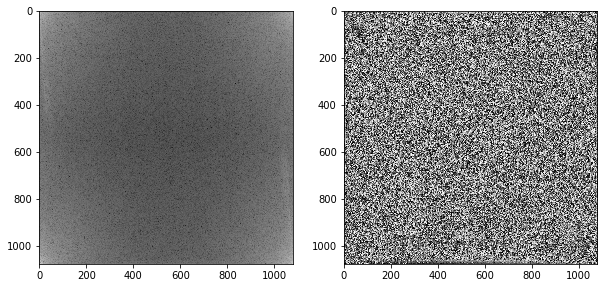

In [10]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(np.log(np.abs(dft_im_gray)),cmap="gray")
ax2.imshow(np.angle(dft_im_gray),cmap="gray")

plt.show()

In [11]:
dft_shift = np.fft.fftshift(dft_im_gray)

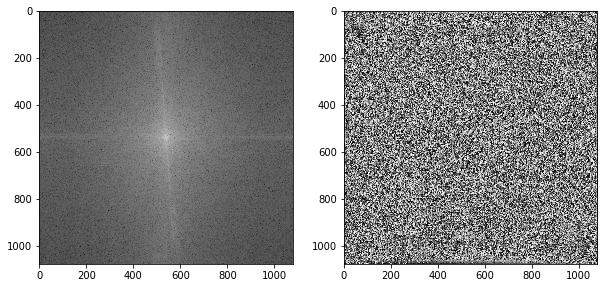

In [12]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(np.log(np.abs(dft_shift)),cmap="gray")
ax2.imshow(np.angle(dft_im_gray),cmap="gray")

plt.show()

In [13]:
halftone = imageio.imread("halftone2.jpg")
halftone = rgb2gray(halftone)

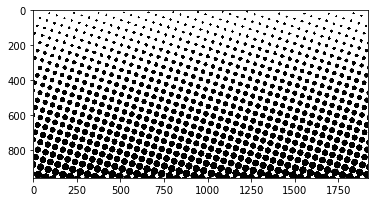

In [14]:
plt.imshow(halftone, cmap='gray')

In [15]:
halftone.shape

(960, 1920)

In [16]:
dft_halftone = np.fft.fft2(halftone)

In [17]:
dft_shift_halftone = np.fft.fftshift(dft_halftone)

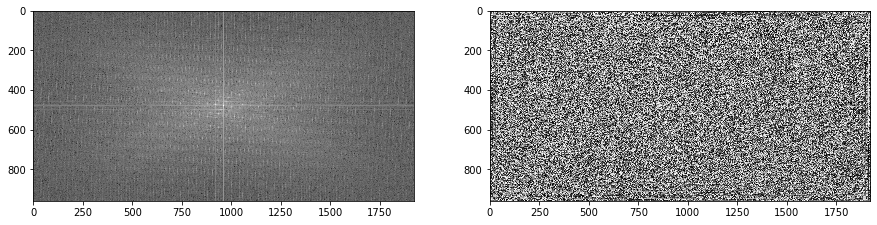

In [18]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(np.log(np.abs(dft_shift_halftone)),cmap="gray")
ax2.imshow(np.angle(dft_halftone),cmap="gray")

plt.show()

Ideal low pass filter

In [40]:
height, width = im_gray.shape
P = height
Q = width

In [41]:
F = np.fft.fftshift(np.fft.fft2(im_gray))

In [42]:
D = 60.0
U, V = np.meshgrid(np.arange(P), np.arange(Q), indexing='ij')
H = (U-P/2)**2 + (V-Q/2)**2 <= D**2

In [45]:
G = H * F

In [48]:
gp = np.real(np.fft.ifft2(np.fft.ifftshift(G)))

g= gp[:height, :width]

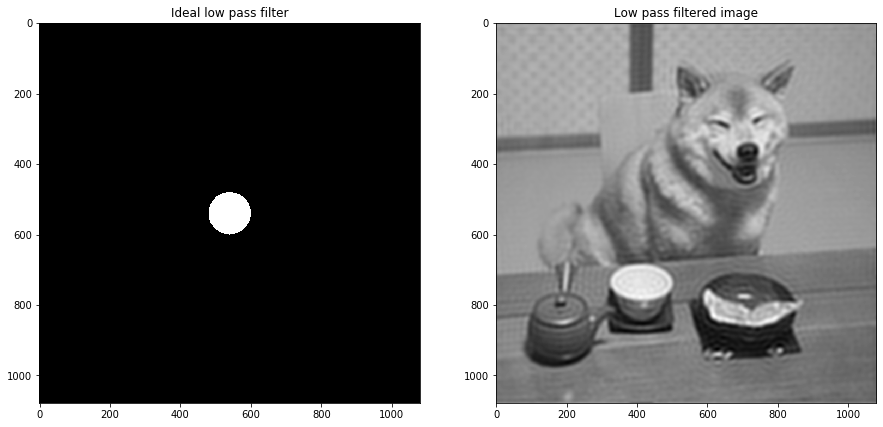

In [58]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(H,cmap="gray")
#f.savefig('ideal_lowpass_filter.jpg')
ax.set_title('Ideal low pass filter')
ax2.imshow(g,cmap="gray")
ax2.set_title('Low pass filtered image')

plt.show()

Ideal lowpass filter with Padding

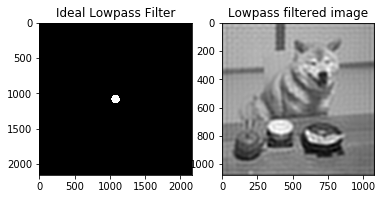

In [33]:
height, width = im_gray.shape
P = 2*height
Q = 2*width
# 2
# See textbook Ch. 4, pp. 253-266 for more discussion on padding! 
im_padded = np.pad(im_gray, ((0, P-height), (0, Q-width)), mode='constant', constant_values=(0,0))
# 3
F = np.fft.fftshift(np.fft.fft2(im_padded))
# 4
D0 = 60.0
U, V = np.meshgrid(np.arange(P), np.arange(Q), indexing='ij')
H = (U-P/2)**2 + (V-Q/2)**2 <= D0**2 # compare squared distance to squared D0 instead
# 5
G = H * F
# 6
gp = np.real(np.fft.ifft2(np.fft.ifftshift(G)))
# 7
g = gp[:height, :width]

plt.subplot(121)
plt.imshow(H, cmap='gray')
plt.title('Ideal Lowpass Filter')
plt.subplot(122)
plt.imshow(g, cmap='gray')
plt.title('Lowpass filtered image')
plt.show()